<a href="https://colab.research.google.com/github/inaafina/ArrhythmiaAI/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Team AI Lop IF**

**Model selection: Decision Tree, kNN, Naïve Bayes**



Dataset: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

---





# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading Dataset

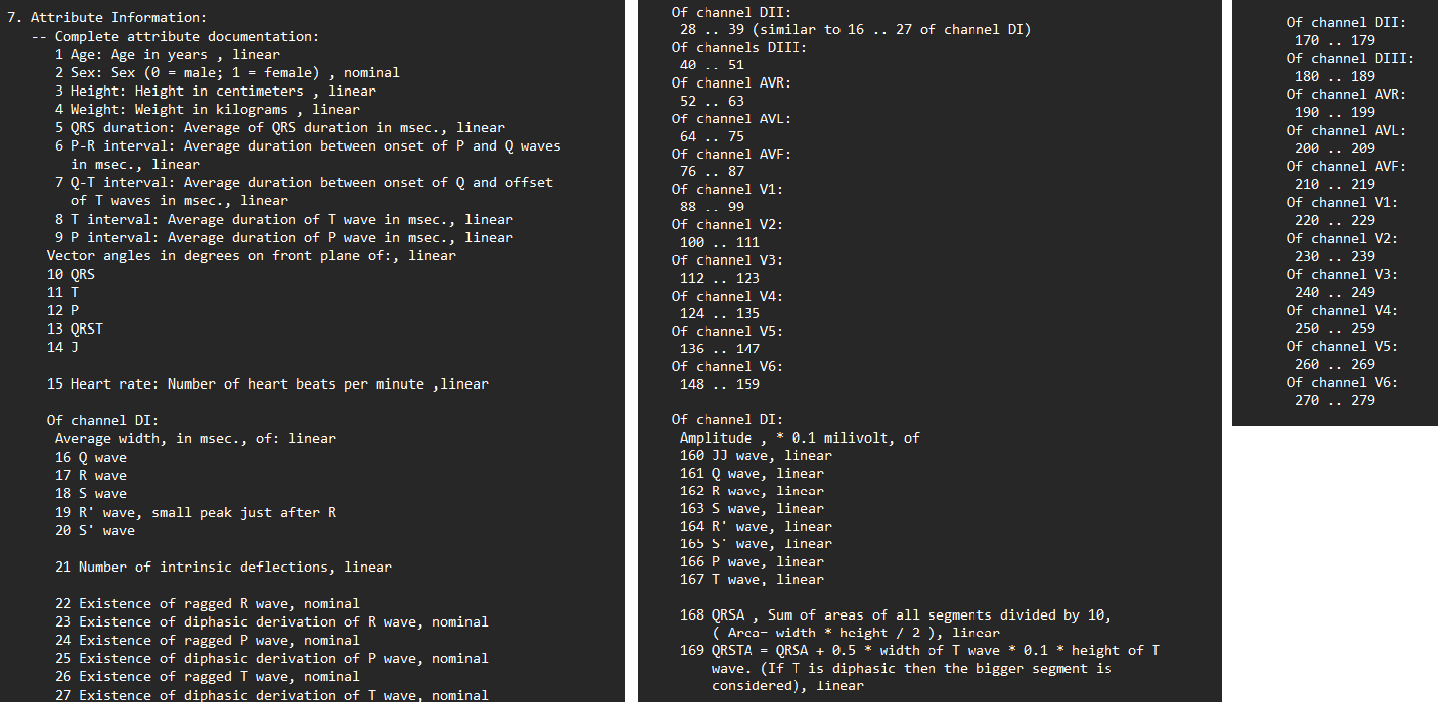

In [ ]:
df = pd.read_csv('data_arrhythmia.csv')

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


# Data Pre-processing

## Checking the null value of each attributes 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [ ]:
df.replace(['?'], np.nan, inplace=True)

In [ ]:
# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Verify the data type conversion
print(df.dtypes)


age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object


In [ ]:
# null_counts = df.isnull().sum()
# print("Null value counts per column:")

# for column, count in null_counts.items():
#   print(f"{column}: {count}")

## Mean Imputation

The attributes with Null Value found is this: 
* T: 8
* P: 22
* QRST: 1
* J: 376
* heart_rate: 1

Here we going to replace the Null value, using Mean Imputation



In [ ]:
column_mean_11 = df['T'].mean()
column_mean_12 = df['P'].mean()
column_mean_13 = df['QRST'].mean()
column_mean_14 = df['J'].mean()
column_mean_15 = df['heart_rate'].mean()
print("Mean of the column T:", column_mean_11)
print("Mean of the column P:", column_mean_12)
print("Mean of the column QRST:", column_mean_13)
print("Mean of the column J:", column_mean_14)
print("Mean of the column heart_rate:", column_mean_15)

Mean of the column T: 36.1509009009009
Mean of the column P: 48.913953488372094
Mean of the column QRST: 36.71618625277162
Mean of the column J: -13.592105263157896
Mean of the column heart_rate: 74.46341463414635


In [ ]:
# Replace NaN values with the mean
df['T'].fillna(column_mean_11, inplace=True)
df['P'].fillna(column_mean_12, inplace=True)
df['QRST'].fillna(column_mean_13, inplace=True)
df['J'].fillna(column_mean_14, inplace=True)
df['heart_rate'].fillna(column_mean_15, inplace=True)

In [ ]:
# if df.isnull().any().any():
#     print("Null values found in the DataFrame")

In [ ]:
# null_counts = df.isnull().sum()
# print("Null value counts per column:")

# for column, count in null_counts.items():
#   print(f"{column}: {count}")

## Checking and Dropping Outliers

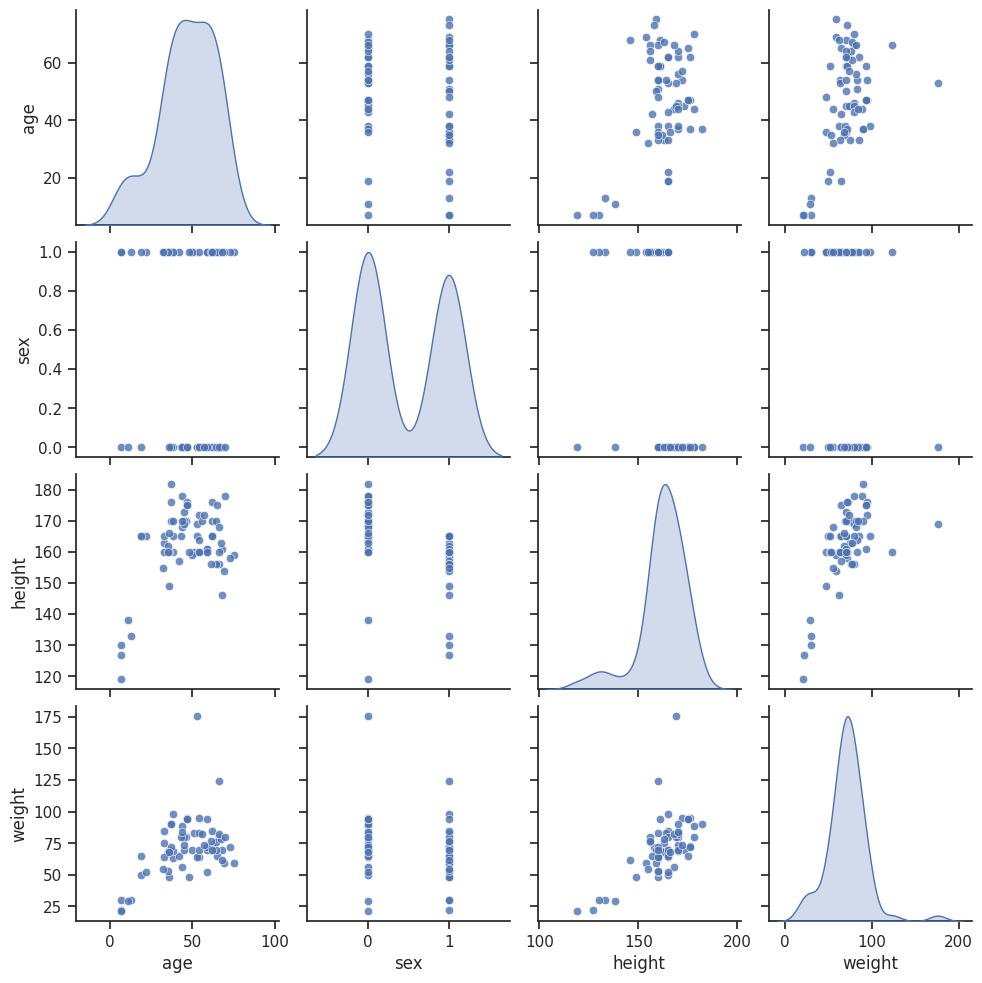

In [ ]:
selected_columns = ['age', 'sex', 'height', 'weight'] 
subset_df = df[selected_columns]

sns.set(style='ticks')
sns.pairplot(subset_df, diag_kind='kde', plot_kws={'alpha': 0.8})

<Axes: xlabel='variable', ylabel='value'>

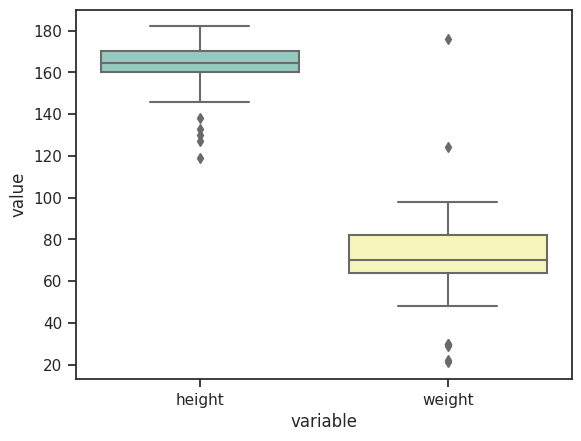

In [ ]:
# checking the extreme outliers in weight(kg) and height(cm)
selected_columns = ['height', 'weight']
subset_df = df[selected_columns]

# Reshape the data into a long format
subset_df = pd.melt(subset_df, var_name='variable', value_name='value')

sns.set(style='ticks')
sns.boxplot(x='variable', y='value', data=subset_df, order=selected_columns, palette='Set3')

In [ ]:
# dropping the extreme outliers

# Calculate the statistics for height column
Q1_height = df['height'].quantile(0.25)
Q3_height = df['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Define the thresholds for height outliers
Max_height = Q3_height + (1.5 * IQR_height)
Min_height = Q1_height - (1.5 * IQR_height)

In [ ]:
# Calculate the statistics for weight column
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define the thresholds for weight outliers
Max_weight = Q3_weight + (1.5 * IQR_weight)
Min_weight = Q1_weight - (1.5 * IQR_weight)


In [ ]:
# Filter out extreme outliers in height and weight columns
df = df[(df['height'] >= Min_height) & (df['height'] <= Max_height) & (df['weight'] >= Min_weight) & (df['weight'] <= Max_weight)]

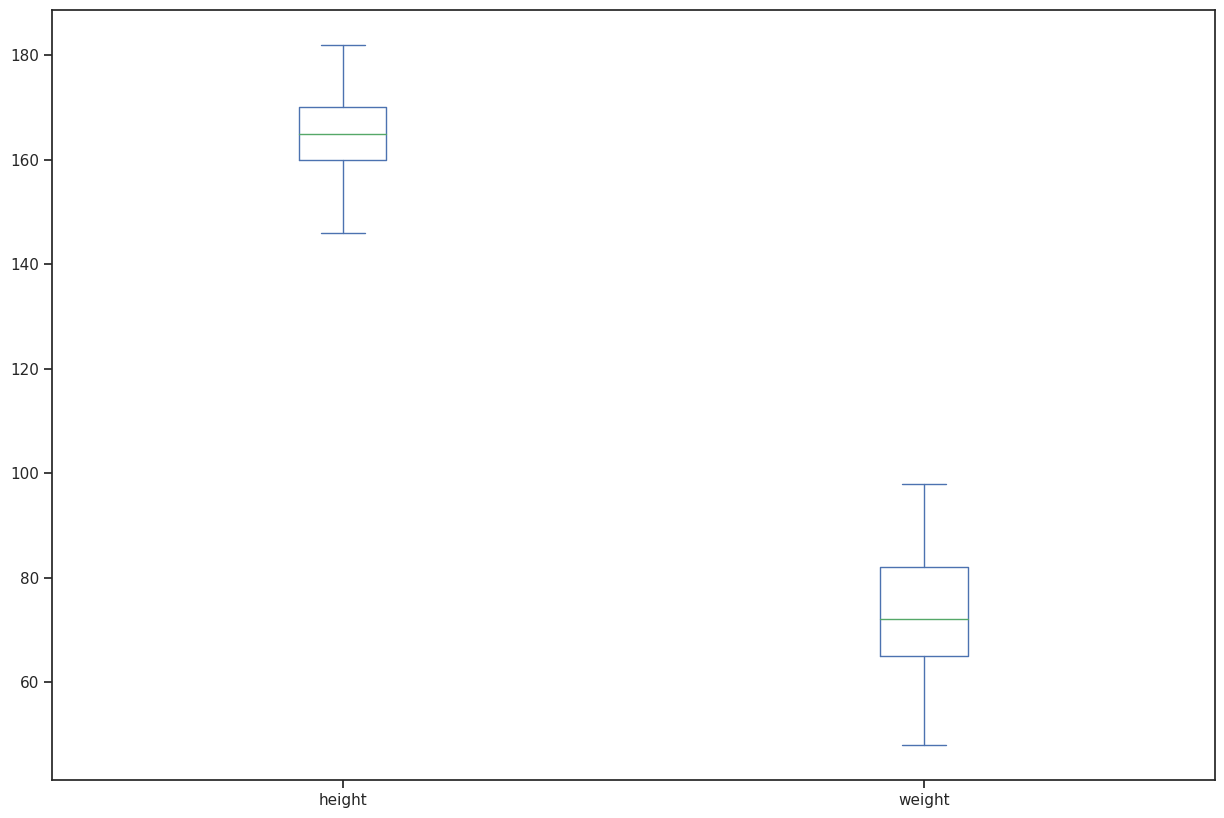

In [ ]:
# Plot boxplots for height and weight columns
selected_columns = ['height', 'weight']
df[selected_columns].plot(kind='box', figsize=(15, 10))

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 2 to 450
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 133.9+ KB


## [EXTRA] Scatter plot 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


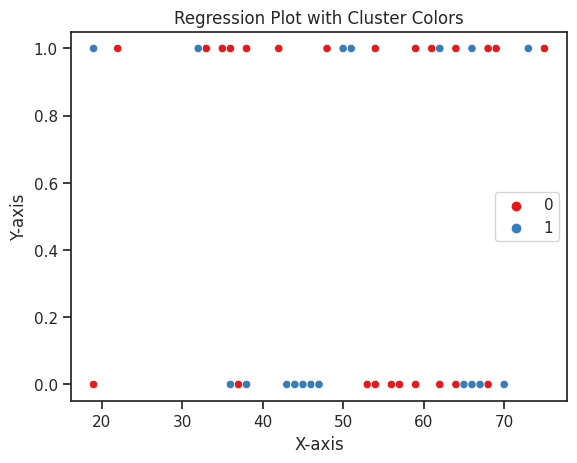

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

# Select the columns you want to use for clustering
X = df.iloc[:, :]  # Replace with your desired columns

# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2)  # Replace 2 with your desired number of clusters

# Fit the data to the KMeans model
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot with different colors for each cluster using Seaborn
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=labels, palette='Set1')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Regression Plot with Cluster Colors')

# Display the plot
plt.show()

## [EXTRA] Calculating the mean and standard deviation

In [ ]:
# df = (df - df.mean())/df.std()
# print(df)

## [EXTRA] Correlation using heatmap

In [ ]:
# corr= df.corr()

# plt.figure(figsize=(15,10))

# plt.title('Correlation', y=1, size=25)

# sns.heatmap(corr, annot= True, linewidths= .5, square=True)

# plt.show()

# Model Exploration

## Splitting Data 

In [ ]:
y = df.diagnosis.values
x = df.drop(["diagnosis"], axis=1)

In [ ]:
# testing 30%, training 70%
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size=0.25, random_state=42)

In [ ]:
x_train.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
323,0.321579,-0.913551,-0.133257,0.797088,0.266060,0.712031,-0.279761,0.937015,1.578651,-0.340485,...,-1.023123,0.524932,1.061782,0.483962,NaN,NaN,1.656225,-1.142366,1.100746,-0.090319
295,-1.204136,1.076685,-0.675170,-0.697774,0.111859,-0.349431,-0.004142,-1.338447,0.427866,1.036865,...,-0.125130,-1.367927,0.939253,0.483962,NaN,NaN,-0.838336,0.721405,0.714641,1.200185
252,-0.259646,-0.913551,0.679612,0.561057,-0.504946,-0.205990,-0.578349,1.145773,0.151677,-1.805285,...,0.593264,0.524932,-1.780885,-0.113222,NaN,NaN,-0.214696,0.255462,-1.110165,-0.775279
357,0.466886,-0.913551,0.679612,0.718411,-0.659147,0.740719,-0.876937,0.603002,-0.400700,0.730788,...,0.144268,0.524932,0.669690,0.483962,NaN,NaN,-0.526516,-0.469337,0.852536,0.520189
188,-2.003320,1.076685,0.002221,-1.641898,0.304611,0.769407,0.799748,0.456872,0.980243,0.096769,...,-1.472119,-0.579236,3.438840,-0.398832,NaN,NaN,0.097124,-1.245908,1.413308,0.053622


In [ ]:
x_test.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
2,0.321579,-0.913551,0.950568,1.741212,1.461120,0.166956,0.340382,-0.232029,0.427866,1.670883,...,1.491257,0.524932,-0.016471,-0.139187,NaN,NaN,-0.838336,1.756833,-0.503429,1.373907
85,1.847295,1.076685,-0.810648,-1.091159,2.424878,-0.292055,1.373955,0.957891,0.197709,0.796376,...,-3.357904,0.524932,0.596173,0.483962,NaN,NaN,-1.461977,-1.918937,3.012886,1.110843
367,0.684845,-0.913551,-0.675170,-1.641898,-0.312194,-0.837130,-0.279761,1.020518,-1.091171,1.189904,...,-0.125130,-0.736974,0.718701,0.483962,NaN,NaN,-0.214696,-0.624652,0.383694,-0.164771
291,-0.332299,-0.913551,0.679612,0.088995,-0.042342,0.195644,0.225541,-0.127650,-0.032448,0.665199,...,-0.214929,-1.841142,0.890242,0.483962,NaN,NaN,0.097124,0.721405,0.530782,1.249820
138,-1.058830,1.076685,-0.404213,-0.383067,-0.774798,-0.033861,-0.164920,-1.296695,1.072306,0.883826,...,0.593264,-0.421497,0.155069,0.068529,NaN,NaN,2.279865,0.514319,-0.287394,0.113184


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
class_mapping = {
    1: "Normal",
    2: "Ischemic changes (Coronary Artery Disease)",
    3: "Old Anterior Myocardial Infarction",
    4: "Old Inferior Myocardial Infarction",
    5: "Sinus tachycardy",
    6: "Sinus bradycardy",
    7: "Ventricular Premature Contraction (PVC)",
    8: "Supraventricular Premature Contraction",
    9: "Left bundle branch block",
    10: "Right bundle branch block",
    11: "1. degree AtrioVentricular block",
    12: "2. degree AV block",
    13: "3. degree AV block",
    14: "Left ventricule hypertrophy",
    15: "Atrial Fibrillation or Flutter",
    16: "Others"
}

df['diagnosis'] = df['diagnosis'].map(class_mapping)


In [ ]:
# matrix X and target variable y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Perform feature scaling using Min-Max Scaling
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# Perform feature scaling using Standardization
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


In [ ]:
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# #KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47368421052631576


## Naive Byes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Multinomial Naive Bayes
# mnb = MultinomialNB()
# mnb.fit(X_train, y_train)
# mnb_y_pred = mnb.predict(X_test)
# mnb_accuracy = accuracy_score(y_test, mnb_y_pred)
# print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_y_pred)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)


Gaussian Naive Bayes Accuracy: 0.15384615384615385
Bernoulli Naive Bayes Accuracy: 0.6373626373626373


# **Reference**

https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u

https://stackoverflow.com/questions/71479659/dataframes-from-data-names-and-test-files-using-pandas

https://towardsdatascience.com/different-imputation-methods-to-handle-missing-data-8dd5bce97583

https://towardsdatascience.com/normalization-vs-standardization-which-one-is-better-f29e043a57eb#:~:text=If%20you%20see%20a%20bell,values%20into%20a%20small%20range.

https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb

https://www.kaggle.com/code/havinath/eda-visualizations-predictions

